In [17]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [18]:
def long_call(price, strike, premium):    
    lc = list(map(lambda x: max(x - strike, 0) - premium, price))
    return lc

def long_put(price, strike, premium):
    lp = list(map(lambda x: max(strike - x ,0) - premium, price))
    return lp
   
def short_call(price, strike, premium):
#Payoff a shortcall is just the inverse of the payoff of a long call 
    sc = long_call(price, strike, premium)
    return [-1.0*SC for SC in sc]

def short_put(price, strike, premium):
#Payoff a short put is just the inverse of the payoff of a long put 
    sp = long_put(price, strike, premium)
    return [-1.0*SP for SP in sp]
    
def binary_call(price, strike, premium):
#Payoff of a binary call is either:     # 1.) Strike if current price > strike     # 2.) 0     
    bc = list(map(lambda x: strike - premium if x > strike else 0 - premium, price))
    return bc

def binary_put(price, strike, premium):
#Payoff of a binary call is either:     # 1.) Strike if current price < strike     # 2.) 0     
    bp = list(map(lambda x: strike - premium if x < strike else 0 - premium, price))
    return bp

In [19]:
#Set parameters
S = [t/5 for t in range(0,1000)] #define some series of stock-prices 
K = 110 #strike price
P = 10  #premium

# Plots for Long/Short/Binary Call/Put

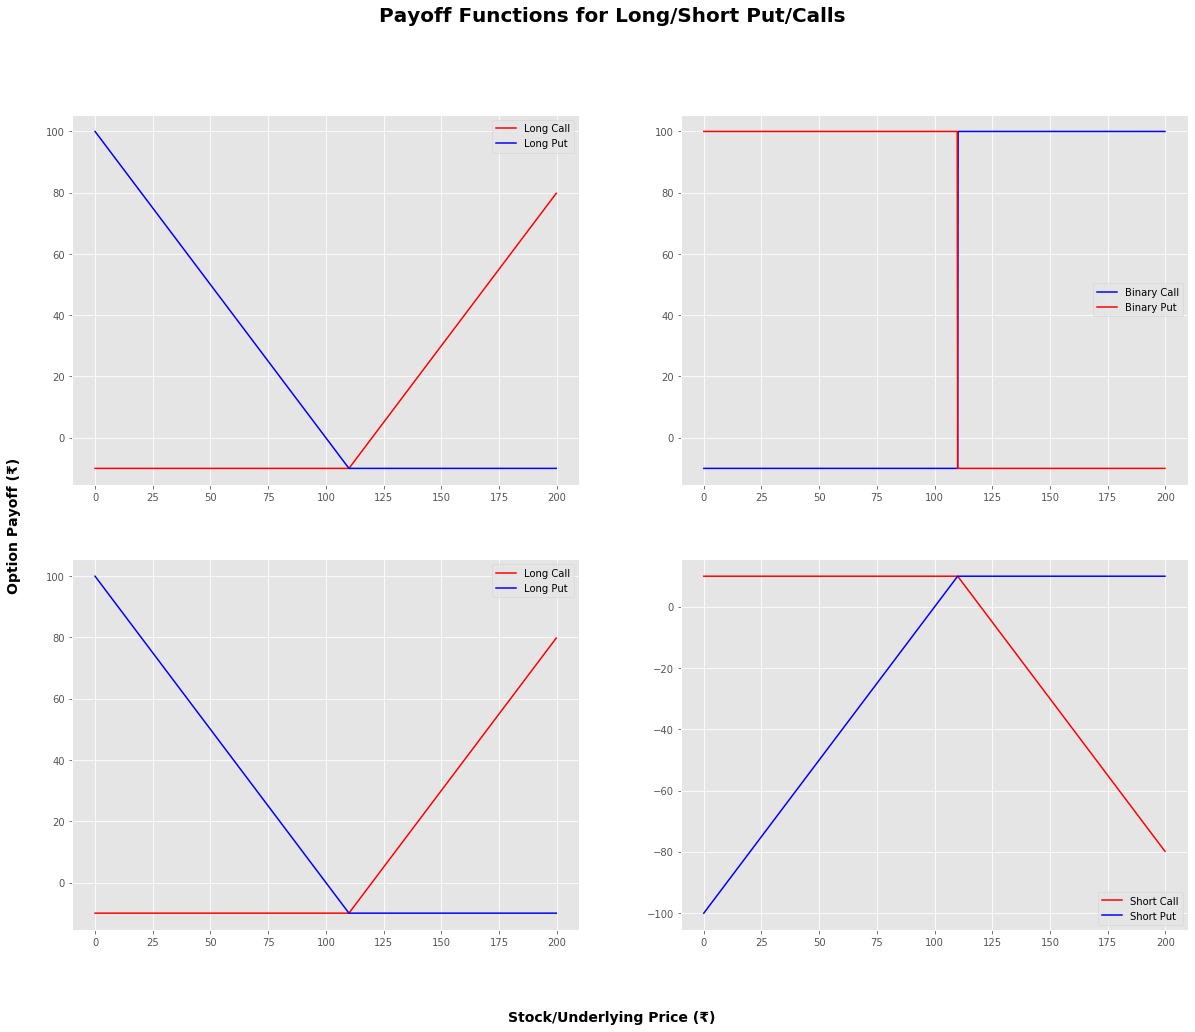

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize = (20,15))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.04, 'Stock/Underlying Price (₹)', ha='center', fontsize=14, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff (₹)', va='center', rotation='vertical', fontsize=14, fontweight='bold')


lc_P = long_call(S,K,P)
lp_P = long_put(S,K,P)
plt.subplot(221)
plt.plot(S, lc_P, 'r')
plt.plot(S, lp_P, 'b')
plt.legend(["Long Call", "Long Put"])


bc_P = binary_call(S,K,P)
bp_P = binary_put(S,K,P)
plt.subplot(222)
plt.plot(S, bc_P, 'b')
plt.plot(S, bp_P, 'r')
plt.legend(["Binary Call", "Binary Put"])
    
T2 = long_call(S,K,P)
T4 = long_put(S,K,P)
plt.subplot(223)
plt.plot(S,T2, 'r')
plt.plot(S, T4, 'b')
plt.legend(["Long Call", "Long Put"])
    
    
sc_P = short_call(S,K,P)
sp_P = short_put(S,K,P)
plt.subplot(224)
plt.plot(S, sc_P, 'r')
plt.plot(S, sp_P, 'b')
plt.legend(["Short Call", "Short Put"])
    
plt.show()

# Bull Spread, Bear Spread, Straddle, Risk Reversal, Strangle, Butterfly Spread, Strips, Straps

Bull Spread: Bullish, vertical spread options strategy that is designed to profit from a moderate rise in the price of the underlying security.

Bear Spead: Used by investor who is mildly bearish and wants to maximize profit while minimizing losses

Straddle: Trader buys/sells a Call option and a Put option simultaneously for the same underlying asset at a certain point of time provided both options have the same expiry date and same strike price

Strangle: Investor holding both a call and a put on the same underlying asset. A strangle covers investors who think an asset will move dramatically but are unsure of the direction. A strangle is profitable only if the underlying asset does swing sharply in price

Risk Reversal: Hedging strategy that protects a long or short position by using put and call options. This strategy protects against unfavorable price movements in the underlying position but limits the profits that can be made on that position

Butterfly Spread: Strategy combining bull and bear spreads, with a fixed risk and capped profit. These spreads, involving either four calls or four puts are intended as a market-neutral strategy and pay off the most if the underlying does not move prior to option expiration.

Strips: When a trader is bearish on the market and bullish on volatility then he will implement this strategy by buying two ATM Put Options & one ATM Call Option, of the same strike price, expiry date & underlying asset.

Straps: Strategy using one put and two calls with the same strike and expiration. Traders use it when they believe a large move in the underlying asset is likely although the direction is still uncertain

In [21]:
def bull_spread(price, strike1, strike2, premium1, premium2):
    
    bs1 = long_call(price, strike1, premium1)
    bs2 = short_call(price, strike2, premium2)
    return [x+y for x,y in zip(bs1, bs2)] 
     
def bear_spread(price, strike1, strike2, premium1, premium2):
    
    bs = bull_spread(price, strike1, strike2, premium1, premium2)
    return [-1.0*p + 1.0 for p in bs] 

def straddle(price, strike, premium1, premium2):
    
    P1 = long_call(price, strike, premium1)
    P2 = long_put(price, strike, premium2)
    return [x+y for x,y in zip(P1, P2)]
    
def risk_reversal(price, strike1, strike2, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = short_put(price, strike2, premium2)
    return [x + y for x, y in zip(P1, P2)]

def strangle(price, strike1, strike2, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_put(price, strike2, premium2)
    return [x + y for x, y in zip(P1, P2)]


def butterfly_spread(price, strike1, strike2, strike3, premium1, premium2, premium3):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_call(price, strike3, premium3)
    P3 = short_call(price, strike2, premium2)
    P3 =[2*p for p in P3]
    return [x + y + z for x, y, z in zip(P1, P2, P3)]
    
def strip(price, strike1, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_put(price, strike1, premium2)
    P2 = [2*p for p in P2]
    return [x+y for x,y in zip(P1, P2)]

def strap(price, strike1, premium1, premium2):
    
    P1 = long_call(price, strike1, premium1)
    P2 = long_put(price, strike1, premium2)
    P1 = [2*p for p in P1]
    return [x+y for x,y in zip(P1, P2)]

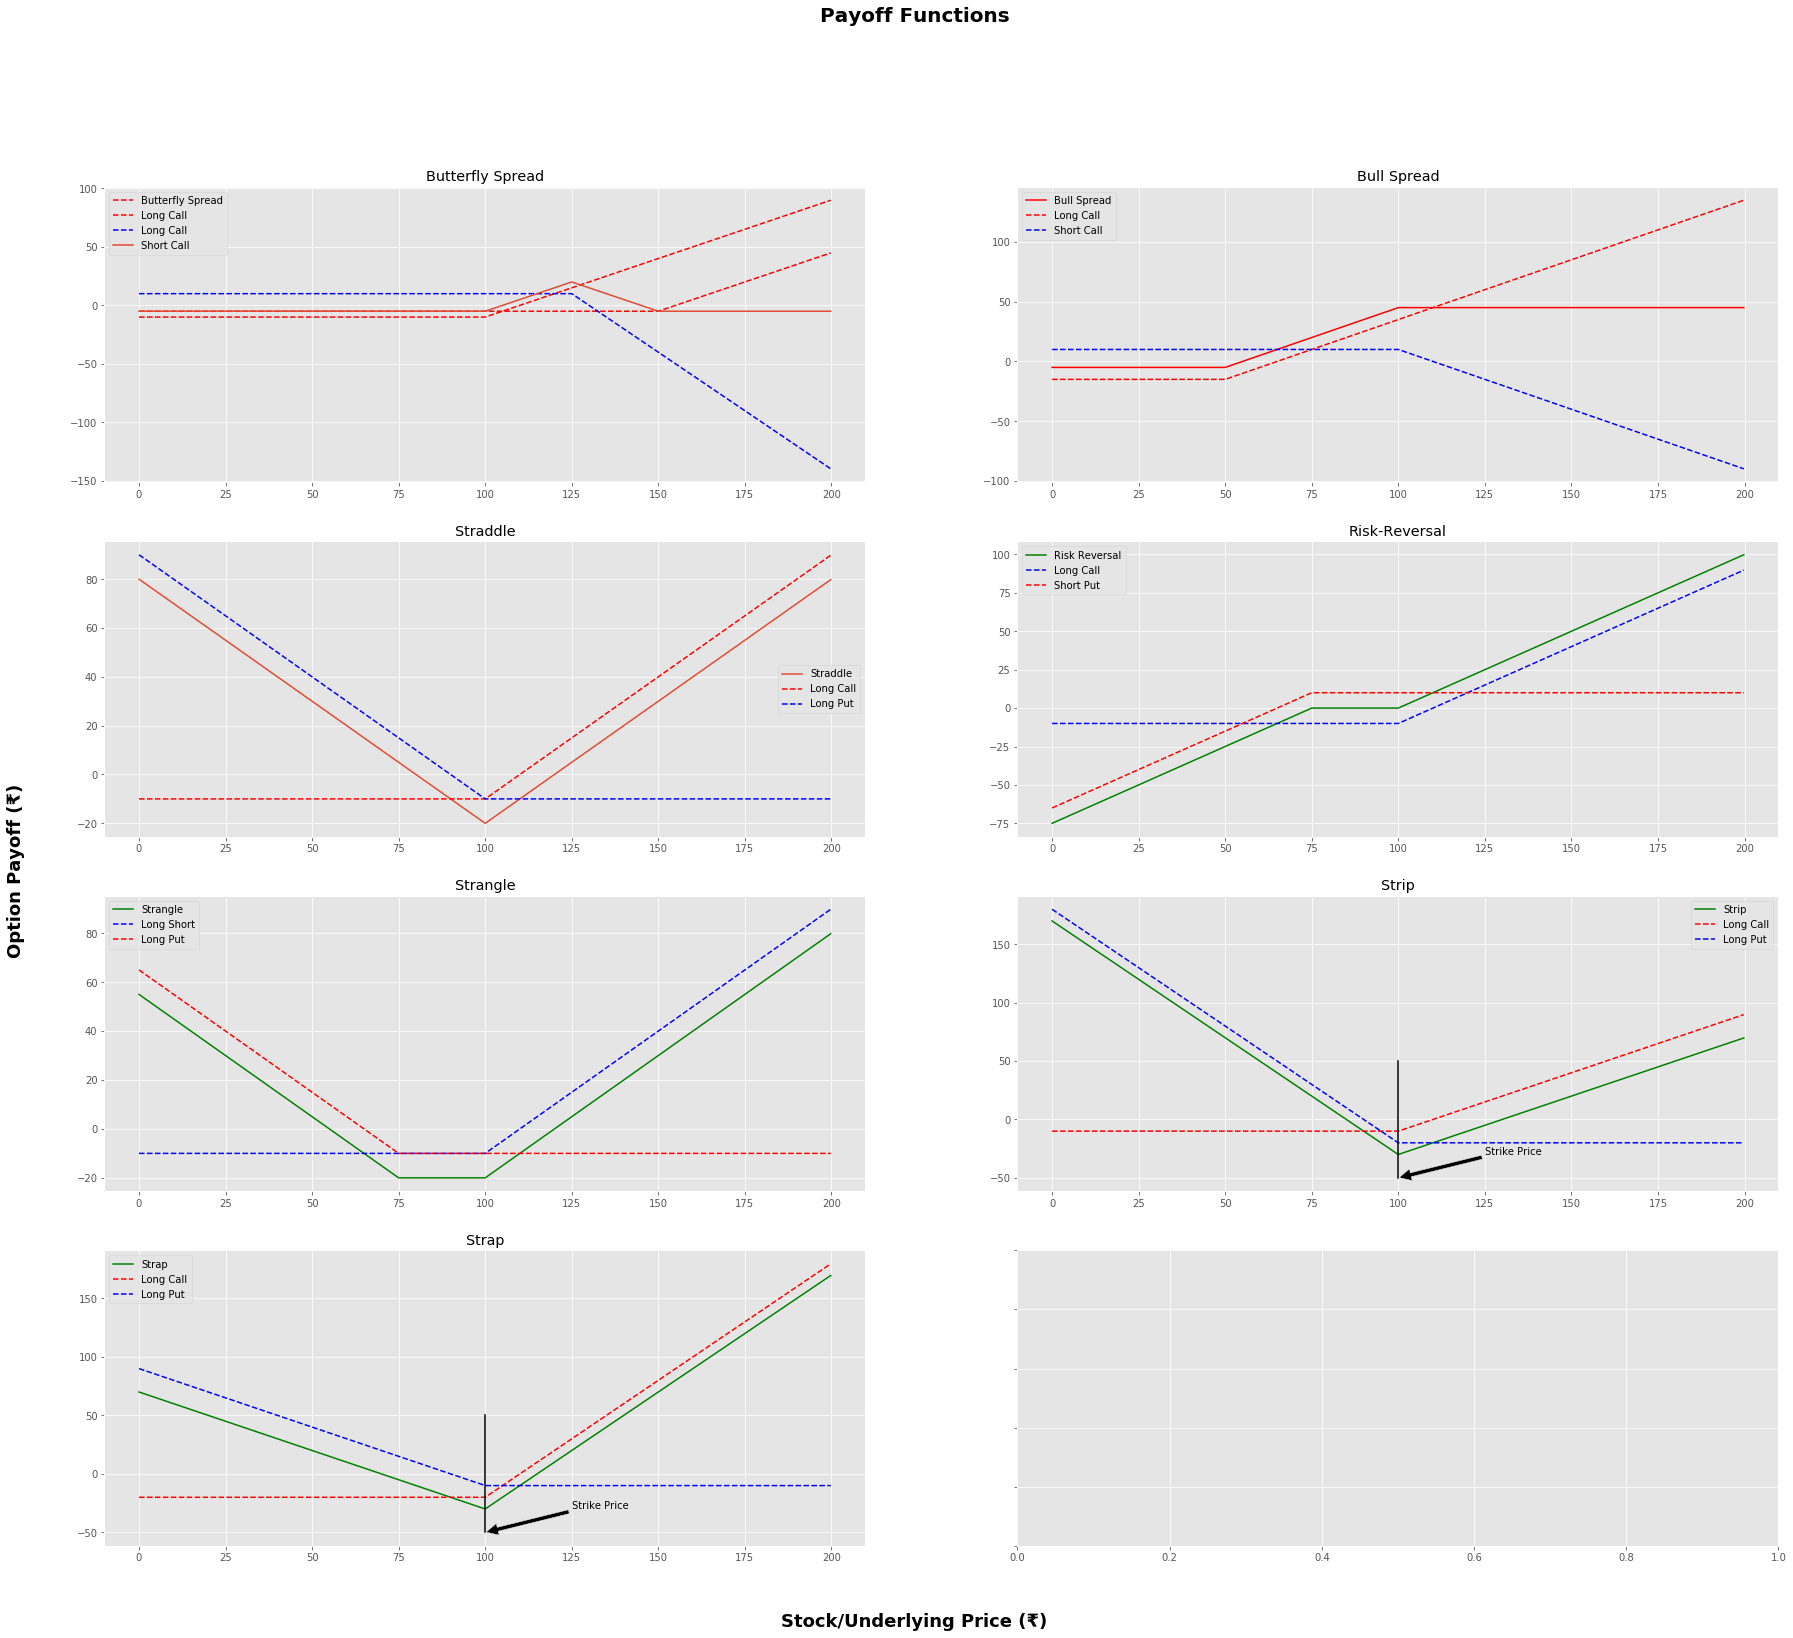

In [22]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(30, 25))
fig.suptitle('Payoff Functions', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price (₹)', ha='center', fontsize=18, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff (₹)', va='center', rotation='vertical', fontsize=18, fontweight='bold')

plt.subplot(421)
P = butterfly_spread(S, 100, 125, 150, 10, 5, 5)
P_1 = long_call(S, 100, 10)
P_2 = long_call(S, 150, 5)
P_3 = short_call(S, 125, 5)
P_3 =[2*p for p in P_3]
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'r--')
plt.plot(S, P_3, 'b--')
plt.plot(S, P)
plt.legend(["Butterfly Spread", "Long Call", "Long Call", "Short Call"])
plt.title("Butterfly Spread")

plt.subplot(422)
P1 = bull_spread(S,50, 100, 15, 10)
long_c = long_call(S, 50, 15)
short_c = short_call(S, 100, 10)
    
plt.plot(S, P1, 'r')
plt.plot(S, long_c, 'r--')
plt.plot(S, short_c, 'b--')

plt.legend(["Bull Spread", "Long Call", "Short Call"])
plt.title("Bull Spread")

plt.subplot(423)
P = straddle(S,100, 10, 10)
P_longcall = long_call(S, 100, 10)
P_longput = long_put(S, 100, 10)
plt.plot(S, P) 
plt.plot(S, P_longcall, 'r--')
plt.plot(S, P_longput, 'b--')
plt.legend(["Straddle", "Long Call", "Long Put"])
plt.title("Straddle")

plt.subplot(424)
P = risk_reversal(S,100,75, 10, 10)
P_longcall = long_call(S, 100, 10)
P_shortput = short_put(S,75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_shortput, 'r--')
plt.legend(["Risk Reversal", "Long Call", "Short Put"])
plt.title("Risk-Reversal")

plt.subplot(425)
P = strangle(S,100, 75, 10, 10)
P_longcall = long_call(S, 100, 10)
P_longput = long_put(S, 75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_longput, 'r--')
plt.legend(["Strangle", "Long Short", "Long Put"])
plt.title("Strangle")

plt.subplot(426)
P_1 = long_call(S, 100, 10)
P_2 = long_put(S, 100, 10)
P_2 = [2*p for p in P_2]
P = strip(S, 100, 10, 10 )
plt.plot(S, P, 'g')
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'b--')
plt.plot([100,100],[-50,50],'black')
plt.legend(["Strip", "Long Call", "Long Put"])
plt.annotate('Strike Price', xy=(100, -50), xytext=(125, -30), arrowprops = dict(facecolor='black', shrink=0.01))
plt.title("Strip")

plt.subplot(427)
P_1 = long_call(S, 100, 10)
P_2 = long_put(S, 100, 10)
P_1 = [2*p for p in P_1]
P = strap(S, 100, 10, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'b--')
plt.plot([100,100],[-50,50],'black')
plt.legend(["Strap", "Long Call", "Long Put"])
plt.annotate('Strike Price', xy=(100, -50), xytext=(125, -30), arrowprops = dict(facecolor='black', shrink=0.01))
plt.title("Strap")

plt.show()